In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


100: resid=514.960566
200: resid=374.978106
300: resid=311.459133
400: resid=272.721033
500: resid=245.736460
600: resid=225.472036
700: resid=209.507717
800: resid=196.504998
900: resid=185.646457
1000: resid=176.395420
1100: resid=168.380435
1200: resid=161.334381
1300: resid=155.059751
1400: resid=149.407476
1500: resid=144.263276
1600: resid=139.538454
1700: resid=135.163464
1800: resid=131.083301
1900: resid=127.254128
2000: resid=123.640755
2100: resid=120.214749
2200: resid=116.952987
2300: resid=113.836548
2400: resid=110.849847
2500: resid=107.979970
2600: resid=105.216145
2700: resid=102.549330
2800: resid=99.971882
2900: resid=97.477296
3000: resid=95.059999
3100: resid=92.715179
3200: resid=90.438654
3300: resid=88.226762
3400: resid=86.076273
3500: resid=83.984316
3600: resid=81.948322
3700: resid=79.965978
3800: resid=78.035184
3900: resid=76.154024
4000: resid=74.320739
4100: resid=72.533700
4200: resid=70.791399
4300: resid=69.092425
4400: resid=67.435456
4500: resid=65

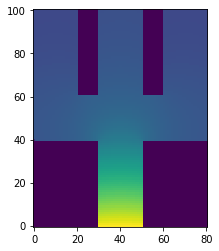

In [3]:
imax = 81
jmax = 101

h = 100
k = 250
Tw = 25
T0 = 200

dx = .01
dy = .01

T = zeros((imax,jmax))
mask = zeros((imax,jmax))
a = zeros((imax,jmax))
b = zeros((imax,jmax))
c = zeros((imax,jmax))
d = zeros((imax,jmax))
e = zeros((imax,jmax))
f = zeros((imax,jmax))

#for mask
for i in range(imax):
    for j in range(jmax):
        mask[i,j] = 1
        mask[0:30,0:40] = 0
        mask[50:imax,0:40] = 0
        mask[20:30,60:jmax] = 0
        mask[50:60,60:jmax] = 0
        
#for internal points
for i in range(imax-1):
    for j in range(jmax-1):
        if mask[i,j] == 1:
        
            a[i,j] = 1
            b[i,j] = 1
            c[i,j] = 1
            d[i,j] = 1
            e[i,j] = -4
            f[i,j] = 0

#for B1 Dirlecht:
for i in range(imax):
    for j in range(jmax):
        a[30:51,0] = 0
        b[30:51,0] = 0
        c[30:51,0] = 0
        d[30:51,0] = 0
        e[30:51,0] = 1
        f[30:51,0] = 200
        T[30:51,0] = 200
        mask[30:51,0] = 1
        
#for LHS Bottom vertical:
for i in range(imax):
    for j in range(jmax):
        a[30,1:40] = 1
        b[30,1:40] = 0
        c[30,1:40] = 0
        d[30,1:40] = 0
        e[30,1:40] = -(1 + ((dx*h)/k))
        f[30,1:40] = -(((dx*h)/k)*Tw)
        mask[30,1:40] = 1

#for RHS bottom vertical:
for i in range(imax):
    for j in range(jmax):
        a[50,1:40] = 0
        b[50,1:40] = -1
        c[50,1:40] = 0
        d[50,1:40] = 0
        e[50,1:40] = (1 + ((dx*h)/k))
        f[50,1:40] = (((dx*h)/k)*Tw)
        mask[50,1:40] = 1

#for horizontal LH boundary:
for i in range(imax):
    for j in range(jmax):
        a[1:30,40] = 0
        b[1:30,40] = 0
        c[1:30,40] = 1
        d[1:30,40] = 0
        e[1:30,40] = -(1 + ((dx*h)/k))
        f[1:30,40] = -(((dx*h)/k)*Tw)
        mask[1:30,40] = 1

#for horizontal RH boundary: 
for i in range(imax):
    for j in range(jmax):
        a[51:imax,40] = 0
        b[51:imax,40] = 0
        c[51:imax,40] = 1
        d[51:imax,40] = 0
        e[51:imax,40] = -(1 + ((dx*h)/k))
        f[51:imax+1,40] = -(((dx*h)/k)*Tw)
        mask[51:imax+1,40] = 1
        
#for top left vertical:
for i in range(imax):
    for j in range(jmax):
        a[0,41:jmax] = 1
        b[0,41:jmax] = 0
        c[0,41:jmax] = 0
        d[0,41:jmax] = 0
        e[0,41:jmax] = -(1 + ((dx*h)/k))
        f[0,41:jmax] = -(((dx*h)/k)*Tw)
        mask[0,41:jmax] = 1

#for first RHS vertical boundary:
for i in range(imax):
    for j in range(jmax):
        a[20,60:jmax] = 0
        b[20,60:jmax] = -1
        c[20,60:jmax] = 0
        d[20,60:jmax] = 0
        e[20,60:jmax] = (1 + ((dx*h)/k))
        f[20,60:jmax] = (((dx*h)/k)*Tw)
        mask[20,60:jmax] = 1

#for horizontal left middle boundary:

for i in range(imax):
    for j in range(jmax):
        a[20:30,60] = 0
        b[20:30,60] = 0
        c[20:30,60] = 0
        d[20:30,60] = -1
        e[20:30,60] = (1 + ((dy*h)/k))
        f[20:30,60] = ((dy*h)/k)*Tw
        mask[20:30,60] = 1

#for horizontal right middle boundary:

for i in range(imax):
    for j in range(jmax):
        a[50:61,60] = 0
        b[50:61,60] = 0
        c[50:61,60] = 0
        d[50:61,60] = -1
        e[50:61,60] = (1 + ((dy*h)/k))
        f[50:61,60] = ((dy*h)/k)*Tw
        mask[50:61,60] = 1
        
#for middle LHS boundary:
for i in range(imax):
    for j in range(jmax):
        a[30,60:jmax] = 1
        b[30,60:jmax] = 0
        c[30,60:jmax] = 0
        d[30,60:jmax] = 0
        e[30,60:jmax] = -(1 + ((dx*h)/k))
        f[30,60:jmax] = -(((dx*h)/k)*Tw)
        mask[30,60:jmax] = 1

#for middle RHS boundary:
for i in range(imax):
    for j in range(jmax):
        a[50,60:jmax] = 0
        b[50,60:jmax] = -1
        c[50,60:jmax] = 0
        d[50,60:jmax] = 0
        e[50,60:jmax] = (1 + ((dx*h)/k))
        f[50,60:jmax] = (((dx*h)/k)*Tw)
        mask[50,60:jmax] = 1

#for right LHS boundary:
for i in range(imax):
    for j in range(jmax):
        a[60,61:jmax] = 1
        b[60,61:jmax] = 0
        c[60,61:jmax] = 0
        d[60,61:jmax] = 0
        e[60,61:jmax] = -(1 + ((dx*h)/k))
        f[60,61:jmax] = -(((dx*h)/k)*Tw)
        mask[60,61:jmax] = 1

#for top right vertical:
for i in range(imax):
    for j in range(jmax):
        a[imax-1,40:jmax] = 0
        b[imax-1,40:jmax] = -1
        c[imax-1,40:jmax] = 0
        d[imax-1,40:jmax] = 0
        e[imax-1,40:jmax] = (1 + ((dx*h)/k))
        f[imax-1,40:jmax] = (((dx*h)/k)*Tw)
        mask[imax-1,40:jmax] = 1

#for top horizontal lhs boundary:
for i in range(imax):
    for j in range(jmax):
        a[0:20,jmax-1] = 0
        b[0:20,jmax-1] = 0
        c[0:20,jmax-1] = 0
        d[0:20,jmax-1] = -1
        e[0:20,jmax-1] = (1 + ((dy*h)/k))
        f[0:20,jmax-1] = ((dy*h)/k)*Tw
        mask[0:20,jmax-1] = 1
        
#for top horizontal middle boundary:
for i in range(imax):
    for j in range(jmax):
        a[30:50,jmax-1] = 0
        b[30:50,jmax-1] = 0
        c[30:50,jmax-1] = 0
        d[30:50,jmax-1] = -1
        e[30:50,jmax-1] = (1 + ((dy*h)/k))
        f[30:50,jmax-1] = ((dy*h)/k)*Tw
        mask[30:50,jmax-1] = 1

#for top horizontal right boundary:
for i in range(imax):
    for j in range(jmax):
        a[60:imax,jmax-1] = 0
        b[60:imax,jmax-1] = 0
        c[60:imax,jmax-1] = 0
        d[60:imax,jmax-1] = -1
        e[60:imax,jmax-1] = (1 + ((dy*h)/k))
        f[60:imax,jmax-1] = ((dy*h)/k)*Tw
        mask[60:imax,jmax-1] = 1

residave=100
cnt=0
omega=1.3
while residave>1.0e-3:
                            residcnt=0
                            residave=0.0
                            for i in range(0,imax,1):
                                for j in range(0,jmax,1):
                                    if (i+j)%2==cnt%2:
                                        if mask[i,j]==1:
                                                resid=(e[i,j]*T[i,j]-f[i,j])
                                                if (i<imax-1):
                                                    resid+= a[i,j]*T[i+1,j]

                                                if (i>0):
                                                    resid+= b[i,j]*T[i-1,j]

                                                if (j < jmax-1):
                                                    resid+= c[i,j]*T[i,j+1]

                                                if (j > 0):
                                                    resid+= d[i,j]*T[i,j-1]

                                                T[i,j]=T[i,j]-omega*(resid/e[i,j])
                                                residave+=math.fabs(resid)
                            residcnt+=1

                            residave=residave/residcnt
                            cnt+=1
                            if cnt%100==0:
                                print("%g: resid=%f" % (cnt,residave))


fig1=figure()
imshow(transpose(T),origin='lower')


        

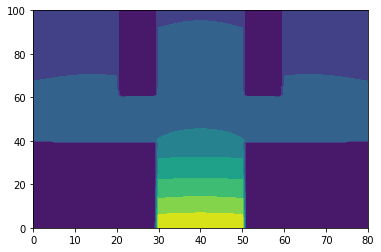

In [4]:
plt.contourf(transpose(T))

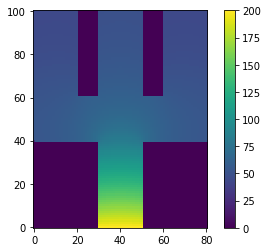

In [5]:
imshow(transpose(T), origin='lower')
plt.colorbar()


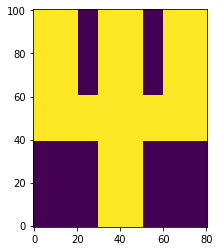

In [6]:
imshow(transpose(mask), origin='lower')

In [ ]:
#For flux calculations

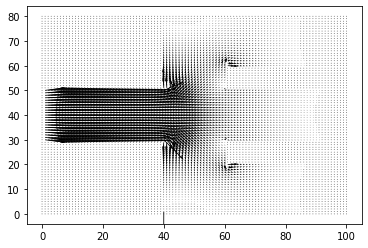

In [9]:
vx = zeros((imax+1,jmax+1))
vy = zeros((imax+1,jmax+1))
test = zeros((imax,jmax))

for i in range(1,imax-1):
    for j in range(1,jmax-1):
        if mask[i,j] == 1:
            if j<=1 and mask[i,j] == 1:
                vx[i,j]=(T[i,j]-T[i,j+1])/dx
                
            if mask[i+1,j] == 1 and mask[i-1,j] == 1:
                vy[i,j]=-(T[i+1,j]-T[i-1,j])/(2.0*dx)
            if mask[i-1,j] == 1:
                vy[i,j]=-(T[i,j]-T[i-1,j])/dx
            if mask[i-1,j] == 0:
                vy[i,j]=-(T[i+1,j]-T[i,j])/dx

            if mask[i,j+1]== 1 and mask[i,j-1]==1:
                vx[i,j]=(T[i,j-1]-T[i,j+1])/(2.0*dx)
            if mask[i,j-1] == 1:
                vx[i,j]=(T[i,j-1]-T[i,j])/dx
            if mask[i,j-1]==0:
                vx[i,j]=(T[i,j]-T[i,j+1])/dx


fig2=figure()
quiver(vx[0:imax,0:jmax],vy[0:imax,0:jmax])

In [10]:
#to calculate total flux lost:

print('The total flux into the radiator is %.f W' % sum(vy[30:50,1]))
print('The total flux out of the radiator is %.f W' % (sum(vx[31,0:40])-sum(vx[49,0:40])-sum(vy[0:30,41])-sum(vy[50:jmax-1,41])+sum(vx[1,40:jmax-1])-sum(vx[imax-2,40:jmax-1])-sum(vy[20:30,59])-sum(vy[50:60,59])+sum(vy[0:20,jmax-1])+sum(vy[30:50,jmax-1])+sum(vy[60:80,jmax-1])))

The total flux into the radiator is -136 W
The total flux out of the radiator is -319 W


In [ ]:
#for new shape

imax = 81
jmax = 101

h = 100
k = 250
Tw = 25
T0 = 200

dx = .01
dy = .01

T = zeros((imax,jmax))
mask = zeros((imax,jmax))
a = zeros((imax,jmax))
b = zeros((imax,jmax))
c = zeros((imax,jmax))
d = zeros((imax,jmax))
e = zeros((imax,jmax))
f = zeros((imax,jmax))

for i in range(imax):
    for j in range(jmax):
        mask[i,j] = 1
        mask[0:60,0:30] = 0
        mask[20:imax,50:60] = 0
        mask[0:70,70:80] = 0
imshow(transpose(mask), origin = 'lower')

#for internal points
for i in range(imax-1):
    for j in range(jmax-1):
        if mask[i,j] == 1:
        
            a[i,j] = 1
            b[i,j] = 1
            c[i,j] = 1
            d[i,j] = 1
            e[i,j] = -4
            f[i,j] = 0
    
#for B1 Dirlecht:
for i in range(imax):
    for j in range(jmax):
        a[60:80,0] = 0
        b[60:80,0] = 0
        c[60:80,0] = 0
        d[60:80,0] = 0
        e[60:80,0] = 1
        f[60:80,0] = 200
        T[60:80,0] = 200
        mask[60:80,0] = 1

#for LHS Bottom vertical:
for i in range(imax):
    for j in range(jmax):
        a[60,0:30] = 1
        b[60,0:30] = 0
        c[60,0:30] = 0
        d[60,0:30] = 0
        e[60,0:30] = -(1 + ((dx*h)/k))
        f[60,0:30] = -(((dx*h)/k)*Tw)
        mask[60,0:30] = 1

#for RHS bottom vertical:
for i in range(imax):
    for j in range(jmax):
        a[80,0:50] = 0
        b[80,0:50] = -1
        c[80,0:50] = 0
        d[80,0:50] = 0
        e[80,0:50] = (1 + ((dx*h)/k))
        f[80,0:50] = (((dx*h)/k)*Tw)
        mask[80,0:50] = 1

#for horizontal LH boundary:
for i in range(imax):
    for j in range(jmax):
        a[1:60,30] = 0
        b[1:60,30] = 0
        c[1:60,30] = 1
        d[1:60,30] = 0
        e[1:60,30] = -(1 + ((dx*h)/k))
        f[1:60,30] = -(((dx*h)/k)*Tw)
        mask[1:60,30] = 1
        
#for LHS middle vertical:
for i in range(imax):
    for j in range(jmax):
        a[0,30:70] = 1
        b[0,30:70] = 0
        c[0,30:70] = 0
        d[0,30:70] = 0
        e[0,30:70] = -(1 + ((dx*h)/k))
        f[0,30:70] = -(((dx*h)/k)*Tw)
        mask[0,30:70] = 1

#for horizontal second boundary:
for i in range(imax):
    for j in range(jmax):
        a[20:80,50] = 0
        b[20:80,50] = 0
        c[20:80,50] = 0
        d[20:80,50] = -1
        e[20:80,50] = (1 + ((dx*h)/k))
        f[20:80,50] = (((dx*h)/k)*Tw)
        mask[20:80,50] = 1

#top rhs boundary:
for i in range(imax):
    for j in range(jmax):
        a[80,60:jmax] = 0
        b[80,60:jmax] = -1
        c[80,60:jmax] = 0
        d[80,60:jmax] = 0
        e[80,60:jmax] = (1 + ((dx*h)/k))
        f[80,60:jmax] = (((dx*h)/k)*Tw)
        mask[80,60:jmax] = 1

#for rhs bend vertical:
for i in range(imax):
    for j in range(jmax):
        a[20,50:60] = 0
        b[20,50:60] = -1
        c[20,50:60] = 0
        d[20,50:60] = 0
        e[20,50:60] = (1 + ((dx*h)/k))
        f[20,50:60] = (((dx*h)/k)*Tw)
        mask[20,50:60] = 1

#for horizontal third boundary:
for i in range(imax):
    for j in range(jmax):
        a[20:80,60] = 0
        b[20:80,60] = 0
        c[20:80,60] = 1
        d[20:80,60] = 0
        e[20:80,60] = -(1 + ((dx*h)/k))
        f[20:80,60] = -(((dx*h)/k)*Tw)
        mask[20:80,60] = 1

#for horizontal fourth boundary:
for i in range(imax):
    for j in range(jmax):
        a[0:70,70] = 0
        b[0:70,70] = 0
        c[0:70,70] = 0
        d[0:70,70] = -1
        e[0:70,70] = (1 + ((dx*h)/k))
        f[0:70,70] = (((dx*h)/k)*Tw)
        mask[0:70,70] = 1

#for horizontal fifth boundary:
for i in range(imax):
    for j in range(jmax):
        a[0:70,80] = 0
        b[0:70,80] = 0
        c[0:70,80] = 1
        d[0:70,80] = 0
        e[0:70,80] = -(1 + ((dx*h)/k))
        f[0:70,80] = -(((dx*h)/k)*Tw)
        mask[0:70,80] = 1

#for top bend boundary:
for i in range(imax):
    for j in range(jmax):
        a[70,70:80] = 1
        b[70,70:80] = 0
        c[70,70:80] = 0
        d[70,70:80] = 0
        e[70,70:80] = -(1 + ((dx*h)/k))
        f[70,70:80] = -(((dx*h)/k)*Tw)
        mask[70,70:80] = 1
        
#for top lhs boundary:
for i in range(imax):
    for j in range(jmax):
        a[0,80:jmax] = 1
        b[0,80:jmax] = 0
        c[0,80:jmax] = 0
        d[0,80:jmax] = 0
        e[0,80:jmax] = -(1 + ((dx*h)/k))
        f[0,80:jmax] = -(((dx*h)/k)*Tw)
        mask[0,80:jmax] = 1
        
#for top boundary: 
for i in range(imax):
    for j in range(jmax):
        a[0:imax,jmax-1] = 0
        b[0:imax,jmax-1] = 0
        c[0:imax,jmax-1] = 0
        d[0:imax,jmax-1] = -1
        e[0:imax,jmax-1] = (1 + ((dx*h)/k))
        f[0:imax,jmax-1] = (((dx*h)/k)*Tw)
        mask[0:imax,jmax-1] = 1

residave=100
cnt=0
omega=1.3
while residave>1.0e-1:
                            residcnt=0
                            residave=0.0
                            for i in range(0,imax,1):
                                for j in range(0,jmax,1):
                                    if (i+j)%2==cnt%2:
                                        if mask[i,j]==1:
                                                resid=(e[i,j]*T[i,j]-f[i,j])
                                                if (i<imax-1):
                                                    resid+= a[i,j]*T[i+1,j]

                                                if (i>0):
                                                    resid+= b[i,j]*T[i-1,j]

                                                if (j < jmax-1):
                                                    resid+= c[i,j]*T[i,j+1]

                                                if (j > 0):
                                                    resid+= d[i,j]*T[i,j-1]

                                                T[i,j]=T[i,j]-omega*(resid/e[i,j])
                                                residave+=math.fabs(resid)
                            residcnt+=1

                            residave=residave/residcnt
                            cnt+=1
                            if cnt%100==0:
                                print("%g: resid=%f" % (cnt,residave))


fig1=figure()
imshow(transpose(T),origin='lower')




In [ ]:
Fx = zeros((imax+1,jmax+1))
Fy = zeros((imax+1,jmax+1))
test = zeros((imax,jmax))

for i in range(1,imax-1):
    for j in range(1,jmax-1):
        if mask[i,j] == 1:
            if j<=1 and mask[i,j] == 1:
                Fx[i,j]=(T[i,j]-T[i,j+1])/dx
                
            if mask[i+1,j] == 1 and mask[i-1,j] == 1:
                Fy[i,j]=-(T[i+1,j]-T[i-1,j])/(2.0*dx)
            if mask[i-1,j] == 1:
                Fy[i,j]=-(T[i,j]-T[i-1,j])/dx
            if mask[i-1,j] == 0:
                Fy[i,j]=-(T[i+1,j]-T[i,j])/dx

            if mask[i,j+1]== 1 and mask[i,j-1]==1:
                Fx[i,j]=(T[i,j-1]-T[i,j+1])/(2.0*dx)
            if mask[i,j-1] == 1:
                Fx[i,j]=(T[i,j-1]-T[i,j])/dx
            if mask[i,j-1]==0:
                Fx[i,j]=(T[i,j]-T[i,j+1])/dx


fig2=figure()
quiver(vx[0:imax:4,0:jmax:4],vy[0:imax:4,0:jmax:4])

In [ ]:
contourf(transpose(T))